#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from plyfile import PlyData, PlyElement

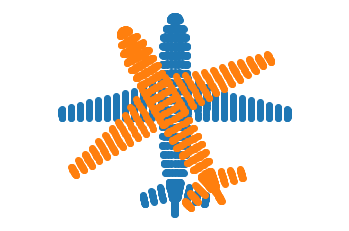

In [18]:
pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)  

ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])
K = np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])
t = np.array([[0], [0], [-4000]])

P1 = K@np.concatenate((R,t), axis = 1)

R2 = np.array([[0.8660,-0.5,0],[0.5,0.8660,0],[0,0,1]])
K2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
t2 = np.array([[0], [0], [-4000]])

P2 = K2@np.concatenate((R2,t2), axis = 1)

x1 = P1@X
x1 = x1/x1[2,:]
x2 = P2@X
x2 = x2/x2[2,:]

fig, ax = plt.subplots(1,1, sharex = True, sharey=True)
ax.scatter(x1[0,:], x1[1, :])
ax.scatter(x2[0,:], x2[1, :])
ax.axis('equal')
ax.axis('off')
plt.show()

Item 1
area in pixels =  59192
area in square milimeter =  2320.563 

Item 2
area in pixels =  59249
area in square milimeter =  2322.798 



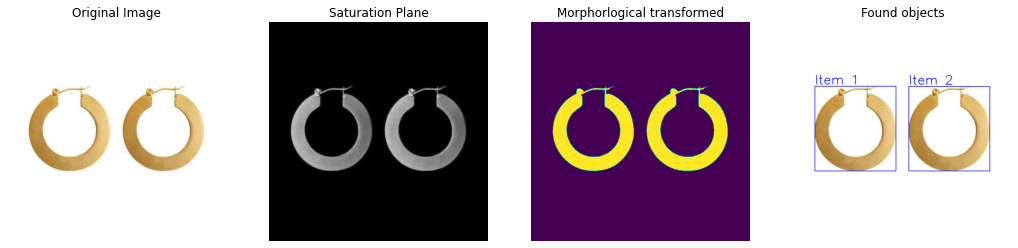

In [19]:
Image = cv.imread("earrings.jpg", cv.IMREAD_COLOR)
assert Image is not None
hsv = cv.cvtColor(Image, cv.COLOR_BGR2HSV)
Imageplot = cv.cvtColor(Image, cv.COLOR_BGR2RGB)
th, bw = cv.threshold(hsv[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(opened)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

z, f = 720, 8

for i, s in enumerate(stats):
    if i !=0:
        print("Item", i)
        print("area in pixels = ", s[4])
        print("area in square milimeter = ", round(s[4]*(2.2e-3)**2*(z*z)/(f*f), 3), "\n")
        cv.rectangle(Image, (s[0], s[1]), (s[0]+s[2], s[1]+s[3]), (255, 0, 0), 2)
        cv.putText(Image, "Item {}".format(i), (s[0], s[1]-10), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv.LINE_AA)

fig, ax = plt.subplots(1, 4, figsize = (18,6))
ax[0].imshow(Imageplot)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(hsv[:,:,1], cmap = 'gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')
ax[2].imshow(opened)
ax[2].set_title('Morphorlogical transformed')
ax[2].axis('off')
ax[3].imshow(cv.cvtColor(Image, cv.COLOR_BGR2RGB))
ax[3].set_title('Found objects')
ax[3].axis('off')
plt.show()

Item 1
area in pixels =  30099
area in square milimeter =  1180.001 

Item 2
area in pixels =  30094
area in square milimeter =  1179.805 



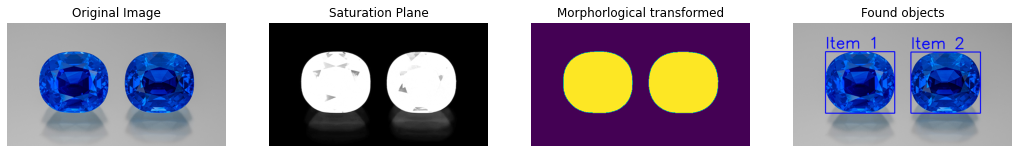

In [20]:
Image = cv.imread("sapphire.jpg", cv.IMREAD_COLOR)
assert Image is not None
hsv = cv.cvtColor(Image, cv.COLOR_BGR2HSV)
Imageplot = cv.cvtColor(Image, cv.COLOR_BGR2RGB)
th, bw = cv.threshold(hsv[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(opened)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

z, f = 720, 8

for i, s in enumerate(stats):
    if i !=0:
        print("Item", i)
        print("area in pixels = ", s[4])
        print("area in square milimeter = ", round(s[4]*(2.2e-3)**2*(z*z)/(f*f), 3), "\n")
        cv.rectangle(Image, (s[0], s[1]), (s[0]+s[2], s[1]+s[3]), (255, 0, 0), 2)
        cv.putText(Image, "Item {}".format(i), (s[0], s[1]-10), cv.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2, cv.LINE_AA)

fig, ax = plt.subplots(1, 4, figsize = (18,10))
ax[0].imshow(Imageplot)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(hsv[:,:,1], cmap = 'gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')
ax[2].imshow(opened)
ax[2].set_title('Morphorlogical transformed')
ax[2].axis('off')
ax[3].imshow(cv.cvtColor(Image, cv.COLOR_BGR2RGB))
ax[3].set_title('Found objects')
ax[3].axis('off')
plt.show()